# Flight Fare Prediction

Problem Statement:
Travelling through flights has become an integral part of today’s lifestyle as more and
more people are opting for faster travelling options. The flight ticket prices increase or
decrease every now and then depending on various factors like timing of the flights,
destination, and duration of flights various occasions such as vacations or festive
season. Therefore, having some basic idea of the flight fares before planning the trip will
surely help many people save money and time.
The main goal is to predict the fares of the flights based on different factors available in
the provided dataset.

* Life Cycle of the particular Data Science Project:
    * 1. EDA [Exploratory Data Analysis]
    * 2. Feature Engineering
    *     .....

* Data Preprocessing:
    1. Importing the required libraries
    2. Importing the dataset
    3. Handling the missing data
    4. Encoding categorical data
    5. Splitting the dataset into Training and Test set
    6. Feature Scaling

* Data Preprocessing and Exploratory data analysis are almost same but they are different in a way that EDA is more about Exploring data in a broder way like graphs and charts.

## Importing the necessary libraries and modules

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the training dataset

In [136]:
train_df=pd.read_excel(r"C:\Users\Prabhat Dangi\iNEURON INTERNSHIP FLIGHT FARE PREDICTION\Data_Train.xlsx")
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [137]:
train_df.shape

(10683, 11)

In [138]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [139]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [140]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [141]:
train_df.dropna(inplace=True)              #veryfew (one or two null values),removing using 'dropna'

In [142]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [143]:
#Categorical variables
cat_feat=[i for i in train_df.columns if train_df[i].dtype=='O']
cat_feat

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

* We can see, that all the independent variables here are categorical.

## EDA [Exploratory Data Analysis]

In [144]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [145]:
train_df['Date_of_Journey'].dtype

dtype('O')

In [146]:
train_df['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

* We can see that Date_of_Journey is a object data type. Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction.

* For this we require pandas to_datetime to convert object data type to datetime dtype.

In [147]:
train_df['Journey_date']=pd.to_datetime(train_df['Date_of_Journey'],format="%d/%m/%Y").dt.day
train_df['Journey_month']=pd.to_datetime(train_df['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [148]:
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [149]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [150]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [151]:
train_df['Dep_hour']=pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df['Dep_min']=pd.to_datetime(train_df['Dep_Time']).dt.minute

In [152]:
train_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [153]:
train_df.drop(['Dep_Time'],axis=1,inplace=True)

In [154]:
train_df.head(5)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [155]:
#Arrival_Time can be extract using pd.to_datetime
train_df['Arrival_hour']=pd.to_datetime(train_df['Arrival_Time']).dt.hour
train_df['Arrival_min']=pd.to_datetime(train_df['Arrival_Time']).dt.minute

#Now we can drop Arrival_Time as it is of no use
train_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [156]:
train_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [157]:
dur=list(train_df['Duration'])
pd.DataFrame(dur)

,0
0,2h 50m
1,7h 25m
2,19h
3,5h 25m
4,4h 45m
...,...
10677,2h 30m
10678,2h 35m
10679,3h
10680,2h 40m


In [158]:
len(dur)

10682

In [159]:
range(len(dur))

range(0, 10682)

In [160]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
dur = list(train_df["Duration"])

for i in range(len(dur)):
    if len(dur[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in dur[i]:
            dur[i] = dur[i].strip() + " 0m"   # Adds 0 minute
        else:
            dur[i] = "0h " + dur[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(dur)):
    duration_hours.append(int(dur[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(dur[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [161]:
train_df['Duration_hours']=duration_hours
train_df['Duration_min']=duration_mins

In [162]:
train_df.drop(['Duration'],axis=1,inplace=True)

In [163]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling Categorical Variables

In [164]:
cat_feat    #categorical variables

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [165]:
print("No of categorical varibles in the dataset are :",len(cat_feat))

No of categorical varibles in the dataset are : 10


* As we can see all the features here, are categorical only.

Q. What are Categorical Variables ?

* Categorical variables are those values in a dataset that contains differet "unique categories".

* Categorical Variables are of two types:

1. Nominal variables: Unordered variables which doesn't have any sense of Order. For Example:

   * male/female
   * smoker/non-smoker
   * sunny/cloudy/rainy/windy/icy (There is no logic to rank windy before sunny)
   * yes/no or True/False
       * NOTE: USE ONE HOT ENCODING.
2. Ordinal variables: Ordered variables which have some sense of order or rank or notion of order. For Example:

   * Education level(BE,ME,Phd)
   * Shirt size(XS,S,M,L,XL)
   * 1/2/3/4/(minimal/moderate/severe/unbearable pain)
       * NOTE: USE LABEL ENCDOING

In [166]:
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [167]:
train_df['Airline']

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10682, dtype: object

## seaborn

* seaborn.catplot()
* Figure-level interface for drawing categorical plots onto a FacetGrid.
* The kind parameter selects the underlying axes-level function to use
1. Categorical scatterplots:
    * stripplot() (with kind="strip"; the default)
    * swarmplot() (with kind="swarm")
2. Categorical distribution plots:

    * boxplot() (with kind="box")
 
    * violinplot() (with kind="violin")

     * boxenplot() (with kind="boxen") 

3. Categorical estimate plots:

     * pointplot() (with kind="point")

     * barplot() (with kind="bar")

     * countplot() (with kind="count")

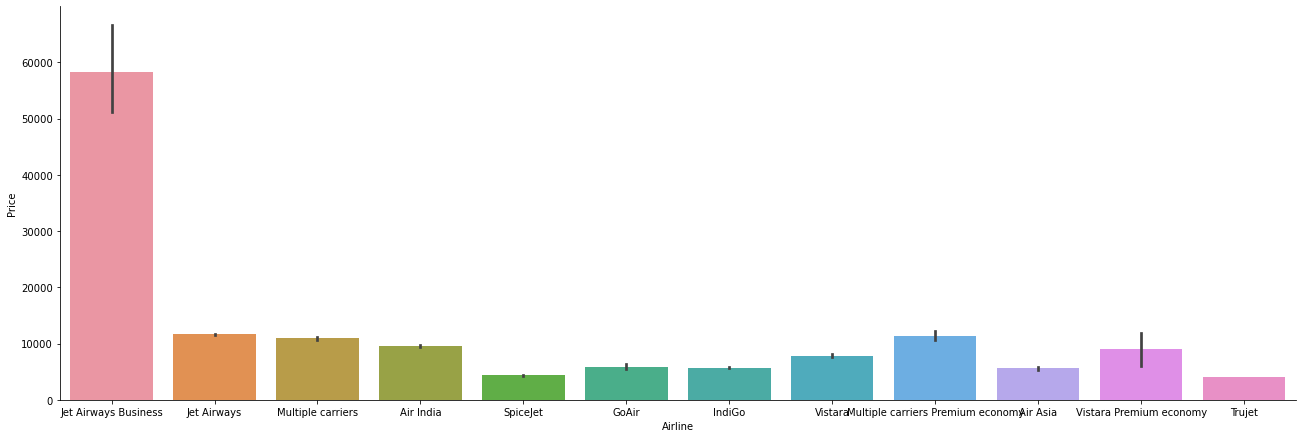

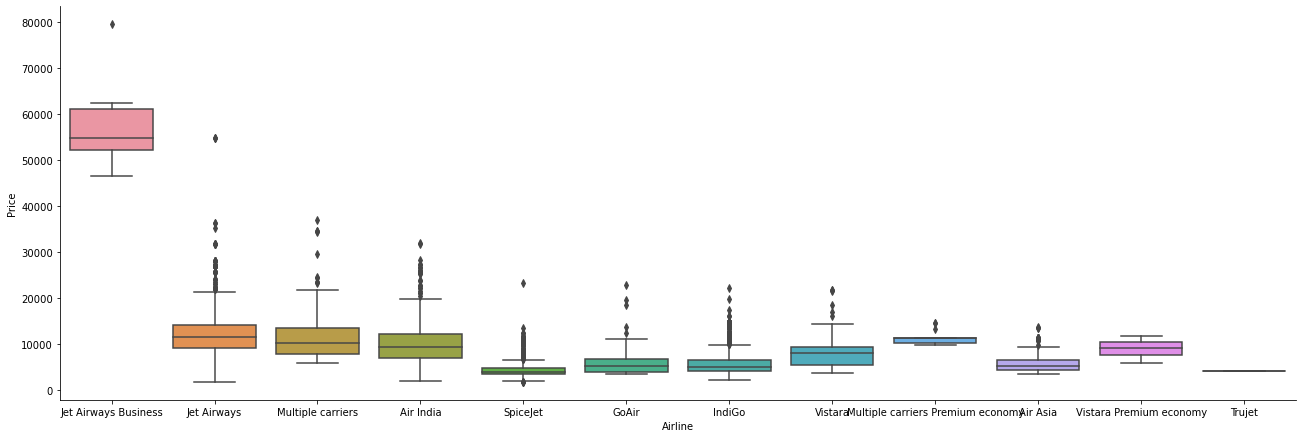

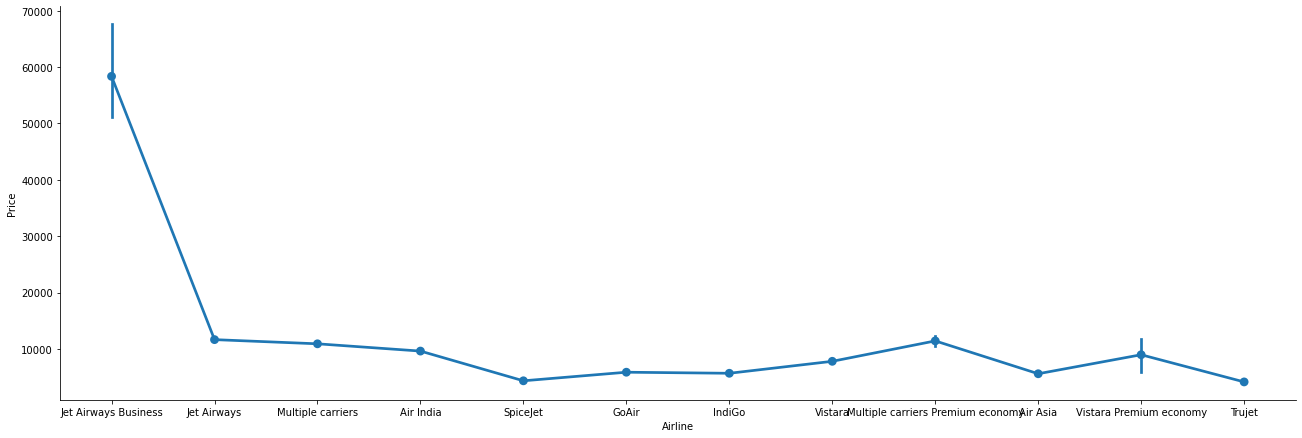

In [168]:
sns.catplot(y='Price',x='Airline',data=train_df.sort_values('Price',ascending=False),kind='bar',height=6,aspect=3)
sns.catplot(y='Price',x='Airline',data=train_df.sort_values('Price',ascending=False),kind='box',height=6,aspect=3)
sns.catplot(y='Price',x='Airline',data=train_df.sort_values('Price',ascending=False),kind='point',height=6,aspect=3)

#train_df.sort_values('Price',ascending=False)           #sorting the Price column from greater to smaller


* From this seaborn visualization we can see that Jet Airways Business is having the highest Price.

* Apart from first Airline, almost all other Airlines have similar median which can be seen from the box_plot.

## Handling Categorical Variables one by one

In [169]:
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [170]:
print(train_df['Airline'].unique())
print('The number of unique categories in the Airline column is:- ',len(train_df['Airline'].unique()))

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
The number of unique categories in the Airline column is:-  12


* "Airline" variable is a Nominal Variable ie. it's an unordered variable. It doesn't have any sense of Order.
* So, we will perform 'One Hot Encoding'

* In One hot Encoding, there will be dummy varibles which will be created according to the number of unique categories in the particular feature.
* So, here in the Airline Varible, we got 12 unique categories and therefore 12 dummy variables will be created.
* And as usual, to prevet "dummy_variable_trap", we will delete one dummy varible.

In [171]:
Airline=train_df[['Airline']]   #creating a new variable with the same name.
                                #This is a two deimensional dataframe with Airline attached to each column name.

Airline=pd.get_dummies(Airline,drop_first=True)     #pd.get_dummies(data,drop_fisrt=True/False)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [172]:
train_df['Airline']

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10682, dtype: object

In [173]:
train_df[['Airline']]      #This is a two dimensional dataframe, with the column name

,Airline
0,IndiGo
1,Air India
2,Jet Airways
3,IndiGo
4,IndiGo
...,...
10678,Air Asia
10679,Air India
10680,Jet Airways
10681,Vistara


* Source variable

In [174]:
train_df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [175]:
print(train_df['Source'].unique())
print("The number of unique categories or cities in the Source column is:- ",len(train_df['Source'].unique()))

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
The number of unique categories or cities in the Source column is:-  5


* We can see that our "Source" column is also a nominal or unordered variable, therefore we will perform One Hot Encoding.

In [176]:
Source=train_df[['Source']]   #Creating a dataframe with Source as the column name.

Source=pd.get_dummies(Source,drop_first=True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


* Destination variable

In [177]:
train_df[['Destination']].value_counts()

Destination
Cochin         4536
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
dtype: int64

In [178]:
Destination=train_df[['Destination']]

Destination=pd.get_dummies(Destination,drop_first=True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


* Route variable

In [179]:
train_df['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

* We can drop "Additional_Info" as it almost doesn't have any information.
* We can also drop "Route" as it is same as the Total_Stops variable.

In [180]:
train_df.drop(['Additional_Info','Route'],axis=1,inplace=True)

* "Total_Stops" Variable

In [181]:
train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

* Here we can see a sense of Order in the variable ie. It's a Ordinal Variable.
* Therefore, we will perform Label Encoding

In [182]:
train_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [183]:
train_df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25


* Concatenate the dummy variables created by One hot Encoding

In [184]:
train_df=pd.concat([train_df,Airline,Source,Destination],axis=1)

In [185]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


* Now we can also drop those Nominal Variables for which we have created those dummy varibles, no need of the original ones now.

In [186]:
train_df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [187]:
train_df.head()    #Final train data

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [188]:
train_df.shape

(10682, 30)

In [189]:
print("_"*125)

_____________________________________________________________________________________________________________________________


## Test Data

In [190]:
test_df=pd.read_excel(r"C:\Users\Prabhat Dangi\iNEURON INTERNSHIP FLIGHT FARE PREDICTION\Test_set.xlsx")
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


## Missing Values

In [191]:
print("Test_data_Info")
print("_"*75)
print(test_df.info())
print("_"*75)

Test_data_Info
___________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
___________________________________________________________________________


In [192]:
##Too many null values, had to drop all these Nan Values
print("Removing_null_values")
print("_"*25)
test_df.dropna(inplace=True)
print(test_df.isnull().sum())

Removing_null_values
_________________________
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


## Preprocessing

In [193]:
test_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


## Handling Time Series data

* "Date_of_Journey" variable

In [194]:
test_df['Date_of_Journey']

0        6/06/2019
1       12/05/2019
2       21/05/2019
3       21/05/2019
4       24/06/2019
           ...    
2666     6/06/2019
2667    27/03/2019
2668     6/03/2019
2669     6/03/2019
2670    15/06/2019
Name: Date_of_Journey, Length: 2671, dtype: object

In [195]:
test_df['Journey_date']=pd.to_datetime(test_df['Date_of_Journey'],format="%d/%m/%Y").dt.day
test_df['Journey_month']=pd.to_datetime(test_df['Date_of_Journey'],format="%d/%m/%Y").dt.month

#remove the Date_of_Journey feature now

test_df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [196]:
test_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_date,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5


* "Dep_Time" variable

In [197]:
test_df['Dep_hour']=pd.to_datetime(test_df['Dep_Time']).dt.hour
test_df['Dep_min']=pd.to_datetime(test_df['Dep_Time']).dt.minute

#drop the "Dep_Time" variable

test_df.drop(['Dep_Time'],axis=1,inplace=True)

In [198]:
test_df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_date,Journey_month,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20


* "Arrival_Time" variable

In [199]:
test_df['Arr_hour']=pd.to_datetime(test_df['Arrival_Time']).dt.hour
test_df['Arr_min']=pd.to_datetime(test_df['Arrival_Time']).dt.minute

test_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [200]:
test_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20


In [201]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
dur = list(test_df["Duration"])

for i in range(len(dur)):
    if len(dur[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in dur[i]:
            dur[i] = dur[i].strip() + " 0m"   # Adds 0 minute
        else:
            dur[i] = "0h " + dur[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(dur)):
    duration_hours.append(int(dur[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(dur[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [202]:
test_df['Duration_hours']=duration_hours
test_df['Duration_min']=duration_mins

In [203]:
test_df.drop(['Duration'],axis=1,inplace=True)

In [204]:
test_df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0


## Handling Categorical Variables

* 'Airline' variable

In [205]:
#perform One Hot Encoding
#its a Nominal variable ie. unordered variable

print("Airline")
print("_"*40)

print(test_df['Airline'].value_counts())

Airline
________________________________________
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64


In [206]:
Airline=test_df[['Airline']]

Airline=pd.get_dummies(Airline,drop_first=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


* "Source" Variable

In [207]:
print("Source")
print("_"*25)

print(test_df['Source'].value_counts())


Source
_________________________
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


In [208]:
Source=test_df[['Source']]

Source=pd.get_dummies(Source,drop_first=True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


* "Destination" Variable

In [209]:
print("Destination")
print("_"*30)

print(test_df['Destination'].value_counts())

Destination
______________________________
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [210]:
Destination=test_df[['Destination']]

Destination=pd.get_dummies(Destination,drop_first=True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


* "Total_Stops" variable

In [211]:
## "Total_Stops" is a Ordinal Varaible ie. you can see a sense of order, therefore assigning keys to them will be fine
print("Total_Stops")
print("_"*30)

print(test_df['Total_Stops'].value_counts())

Total_Stops
______________________________
1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64


In [212]:
test_df['Total_Stops'].replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [213]:
test_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,0,No info,24,6,23,55,2,45,2,50


* Drop irrelevant features

In [214]:
test_df.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [215]:
test_df.head()

,Airline,Source,Destination,Total_Stops,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_min
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [216]:
test_df.drop(['Destination','Source','Airline'],axis=1,inplace=True)

In [217]:
test_df.head()

,Total_Stops,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_min
0,1,6,6,17,30,4,25,10,55
1,1,12,5,6,20,10,20,4,0
2,1,21,5,19,15,19,0,23,45
3,1,21,5,8,0,21,0,13,0
4,0,24,6,23,55,2,45,2,50


In [218]:
test_df=pd.concat([test_df,Airline,Source,Destination],axis=1)

In [219]:
test_df.head()    #final testing data

,Total_Stops,Journey_date,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [220]:
#shape of the test_data

test_df.shape

(2671, 28)

## Feature_Selection

* Note: Feature Selection will Only be done on the Training Dataset.

In [221]:
pd.set_option('display.max_columns',None)   #to display all the column names.
#pd.set_option('display.max_rows',None)

train_df.head()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [222]:
train_df.shape

(10682, 30)

## Independent and dependent variables.

* Now to apply any feature selection technique, we need to split the Training dataset into independent and dependent variables.

In [223]:
train_df.columns

Index(['Total_Stops', 'Price', 'Journey_date', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [224]:
X=train_df.loc[:,['Total_Stops','Journey_date', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

X.head()

,Total_Stops,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [225]:
y=train_df['Price']
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

## Correlation Analysis

In [226]:
train_df.corr().head()

,Total_Stops,Price,Journey_date,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706,0.271094,-0.060110,-0.302991,0.215063,0.017876,0.118399,0.009089,-0.274351,0.002519,-0.120447,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855,0.050432,-0.095151,-0.361070,0.416124,0.253303,0.139793,0.017650,-0.296565,-0.010381,-0.060654,-0.000454,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
Journey_date,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940,-0.032490,-0.003122,0.007281,-0.017304,-0.031713,0.042163,0.030839,0.022154,-0.008569,-0.013169,-0.020115,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254
Journey_month,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897,-0.045981,-0.004494,-0.048504,0.059735,-0.034787,0.053685,-0.051222,-0.011977,-0.014199,-0.017252,-0.019797,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685
Dep_hour,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,-0.012879,-0.016373,-0.023395,0.113942,-0.007524,-0.149992,-0.028672,-0.010451,0.000857,0.023906,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138


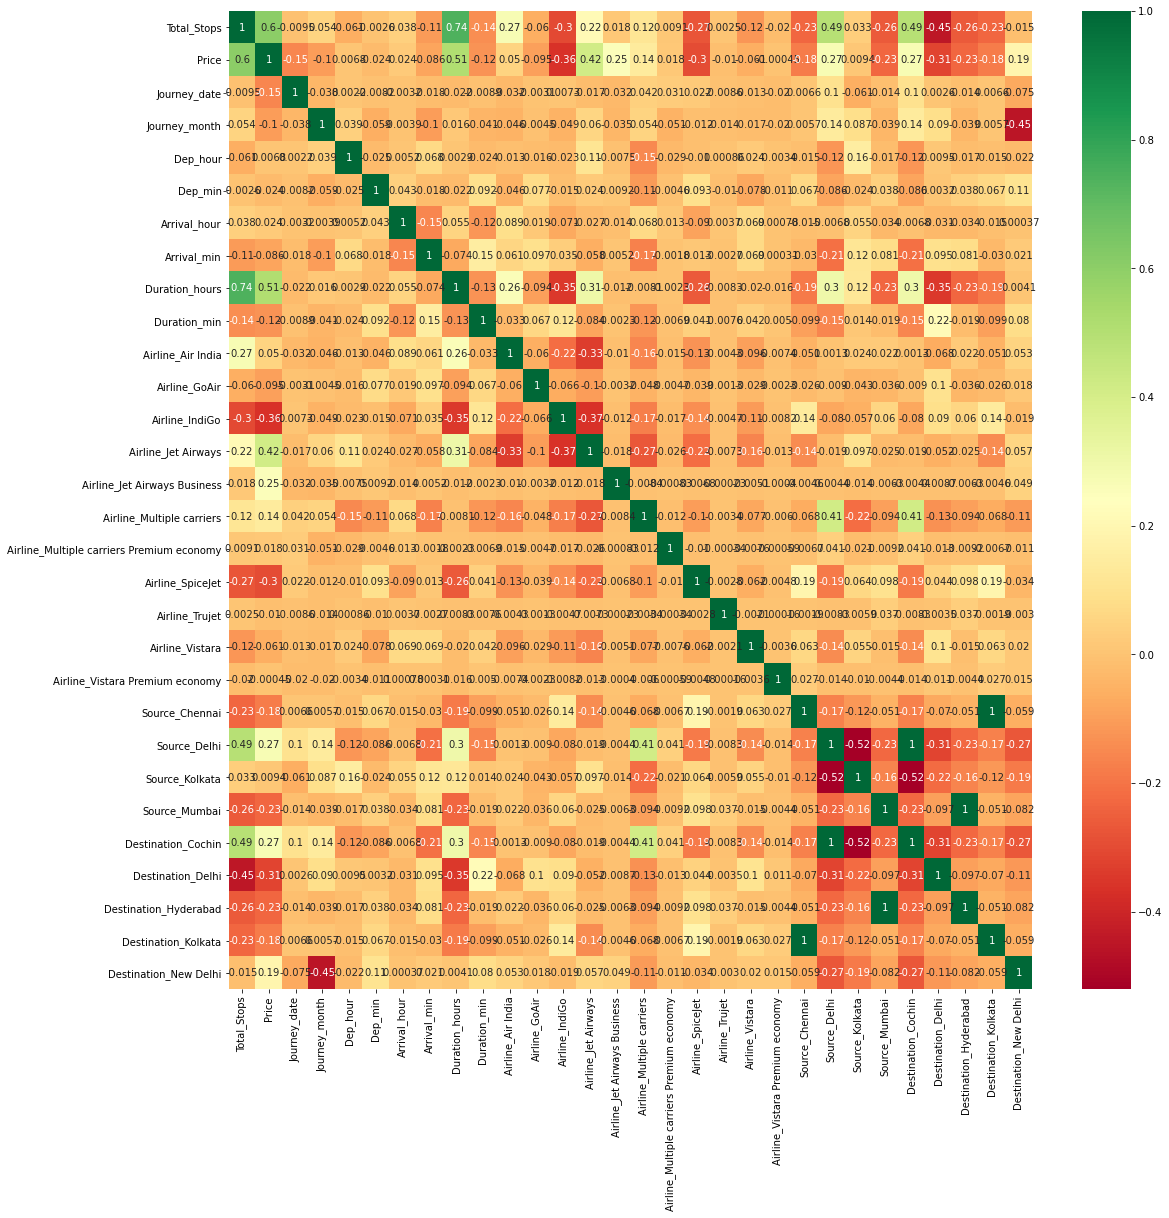

In [227]:
plt.figure(figsize=(18,18))

sns.heatmap(train_df.corr(),annot=True,cmap="RdYlGn")

plt.show()

In [228]:
## Feature Importance using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor

selection=ExtraTreesRegressor()

selection.fit(X,y)

ExtraTreesRegressor()

In [229]:
print(selection.feature_importances_)

[2.46390780e-01 1.44198634e-01 5.31030136e-02 2.46733036e-02
 2.17835397e-02 2.79487340e-02 1.90200532e-02 1.03775884e-01
 1.76542568e-02 9.05779650e-03 1.88158991e-03 1.86736501e-02
 1.37498000e-01 6.73859654e-02 1.90666085e-02 9.07256064e-04
 3.16340691e-03 1.05750313e-04 4.99946358e-03 8.60704310e-05
 3.95809990e-04 8.93047437e-03 3.08636631e-03 6.48702193e-03
 1.20174434e-02 1.62745681e-02 6.17744386e-03 4.90913758e-04
 2.47662020e-02]


<AxesSubplot:>

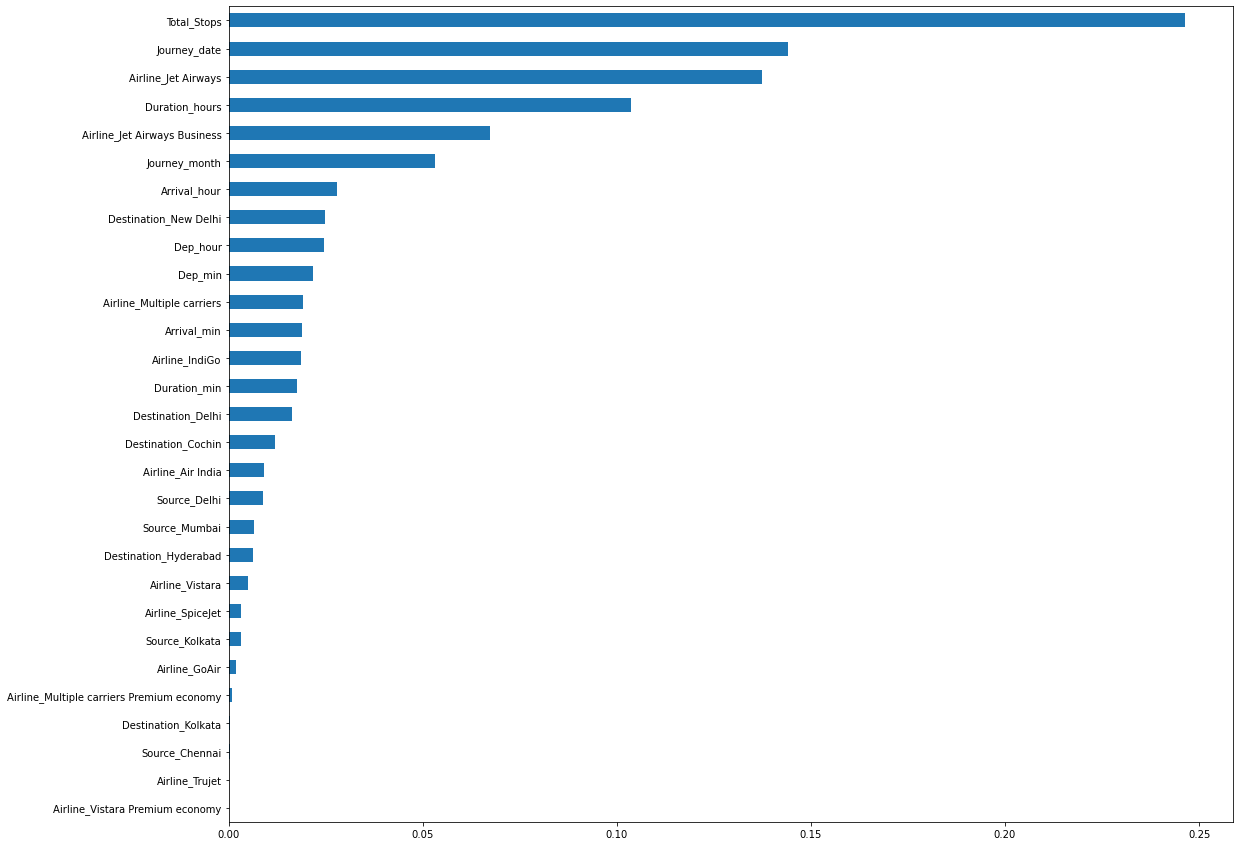

In [230]:
top_feat=pd.Series(selection.feature_importances_)
top_feat.index=X.columns

top_feat.sort_values(ascending=True).plot.barh(figsize=(18,15))

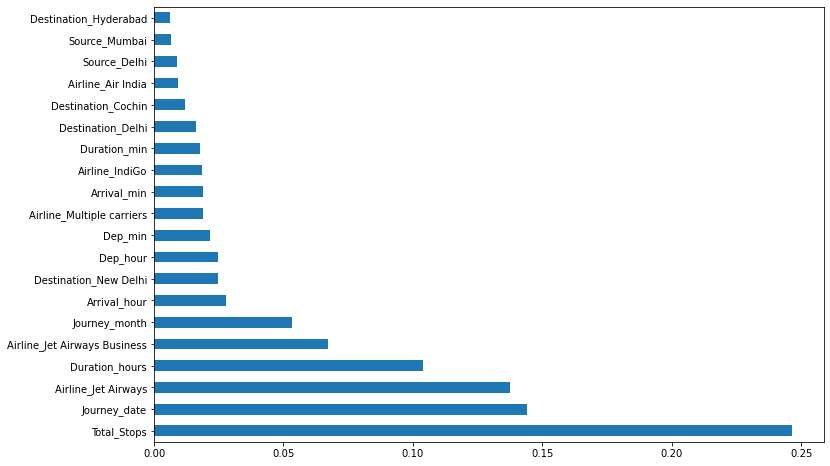

________________________________________________________________________________________________________________________


In [231]:
##Selecting top 20 features

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')     #selecting the top 20 features
plt.show()


print("_"*120)

## Applying Algorithm

* We have training data as well as test data.
* So for fitting the model, we have splitted our training model into X and y
* And for test, we have our Indepedent features(i.e our X_test)

* Lets try with XGboost

In [232]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [233]:
print(X_train.shape)
print(X_test.shape)

(7477, 29)
(3205, 29)


In [234]:
print(y_train.shape)
print(y_test.shape)

(7477,)
(3205,)


In [235]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [236]:
y_pred=model.predict(X_test)                   #shape of X_test: (3205,29)
                                               #shape of y_test: (3205,)   
pd.DataFrame(y_pred,columns=['y_predicted'])

,y_predicted
0,16582.035156
1,6038.809570
2,8116.864746
3,3777.894775
4,14572.593750
...,...
3200,14824.614258
3201,13057.331055
3202,5898.646484
3203,2785.563965


In [237]:
y_test

6075    16655
3544     4959
9291     9187
5032     3858
2483    12898
        ...  
7917    16263
5858    10844
2689     5000
4486     3100
7877     6734
Name: Price, Length: 3205, dtype: int64

In [238]:
model.score(X_train,y_train)

0.9385116458596072

In [239]:
model.score(X_test,y_test)

0.8481160707369962

In [240]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [241]:
metrics.r2_score(y_test,y_pred)

0.8481160707369962

## R_2 Score of nearly 85%

## Error Analysis

In [242]:
#Error Analysis

print("MAE Score is:",metrics.mean_absolute_error(y_test,y_pred))
print("Normalized MAE Score:",1145.3771505323105/(max(y)-min(y)))

print("MSE Score is:",metrics.mean_squared_error(y_test,y_pred))
print("Normalized MSE",3098572.8894735635/(max(y)-min(y)))

MAE Score is: 1145.3771505323105
Normalized MAE Score: 0.014730970516022667
MSE Score is: 3098572.8894735635
Normalized MSE 39.85148983928033


Normalizing the RMSE (the NRMSE) may be usefull to make RMSE scale-free. For instance, by transforming it in a percentage: RMSE/(max(DV)-min(DV))

In [243]:
print("The RMSE Score is:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

The RMSE Score is: 1760.276367356434


In [244]:
print("The Normalized RMSE Score is: ",33.84342108198151/(max(y)-min(y)))

The Normalized RMSE Score is:  0.0004352683636899092


## Hyperparameter Tuning

* We can use RandomSearchCV or GridSearchCV for the following purpose of choosing the optimal values of the parameters.

* We will use RandomSearchCV, as it is fast.

* As we are applying XGBoost Algorithm:

In [245]:
param_dict={
    "gamma":[0,1,2,3],
    "max_depth":[3,4,5,6],
    "min_child_weight":[0,1,2,3],
    "max_delta_step":[0,1,2,3,4,5,6,7,8,9,10],
    "subsample":[0.5,1],
    "learning_rate":[0.01,0.09,0.1,0.2,0.3,0.35,4.0],
    "scale_pos_weight":[0,1]
}

In [246]:
from sklearn.model_selection import RandomizedSearchCV
ran_grid=RandomizedSearchCV(estimator=model,param_distributions=param_dict,n_iter=10,cv=5,n_jobs=1,random_state=42)
ran_grid.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=8,
                                          num_par...
                                          reg_alpha=0, reg_lambda=1,
                                          scale_pos_weight=1, subsample=1,
   

In [247]:
ran_grid.best_params_

{'subsample': 0.5,
 'scale_pos_weight': 0,
 'min_child_weight': 1,
 'max_depth': 4,
 'max_delta_step': 0,
 'learning_rate': 0.1,
 'gamma': 2}

In [274]:
from xgboost import XGBRegressor
model=XGBRegressor(max_depth=6,learning_rate=0.3,subsample=1,gamma=0)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [275]:
y_2_pred=model.predict(X_test)

In [276]:
pd.DataFrame(y_2_pred,columns=['y_predictions_after_Hyperparameter/Tune'])

,y_predictions_after_Hyperparameter/Tune
0,16582.035156
1,6038.809570
2,8116.864746
3,3777.894775
4,14572.593750
...,...
3200,14824.614258
3201,13057.331055
3202,5898.646484
3203,2785.563965


In [277]:
metrics.r2_score(y_test,y_2_pred)

0.8481160707369962

* Even after Hyperparameters tuning, r2_score is quite same. As we know that XGBoost is a powerful algorithm which tries to reduce the residul or error as much as possible. 

In [279]:
("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_2_pred)))

('RMSE:', 1760.276367356434)

## Saving the Model

In [294]:
import pickle

file=open('flight_price_xgb.pkl','wb')

pickle.dump(ran_grid,file)

In [295]:
model_1=open('flight_price_xgb.pkl','rb')

boost=pickle.load(model_1)


In [296]:
y_predictions=boost.predict(X_test)

In [297]:
metrics.r2_score(y_test,y_predictions)

0.818038242311034